#  Exercise  for using  low level functions in Tensorflow

The idea of this exercise is to import data, create train/test datasets, implement a neural network , and train it without TF high level functions. TensorFlow includes nice high level functions, but it is sometimes a good exercise to do more things manually to gain more understanding  what really happens inside the neural network. Furthermore, if you would like to develop your own functions, such as more advanced gradient descent, you need to be able to do things under the hood. We will first try our own optimization implementation to a simple shallow linear network, and then apply it to own implementation of a vanilla RNN network. 


Let us start by first downloading the data.  We use here MNIST dataset and we download it from Yann LeCun webpage (http://yann.lecun.com/exdb/mnist/).  Download the files "train-images-idx3-ubyte.gz" and "train-labels-idx1-ubyte.gz" in your computer in your working folder  and unzip the files if your browser did not do it automatically.


Next, we do all the needed imports. We need numpy, matplotlib, pylab and tensorflow. The MNIST data is in  IDX file format, we use a tool called "idx2numpy" for importing the data.  The idx2numpy imports the data directly to numpy array. You can  install it with pip install idx2numpy. The "%matplotlib inline" allows you to print directly in this notebook.

In [2]:
# do all the needed imports; numpy, matplotlib, tensorflow, pylab, idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import pylab
import idx2numpy
import tensorflow as tf
%matplotlib inline

The next task is to import the data that you have previously downloaded into numpy arrays. If you installed the idx2numpy package, you can use idx2numpy.convert_from_file to import the data.  Import the actual MNIST images and labels into separate numpy arrays.

In [3]:
# open the file for reading
# read the data into a numpy array
# close the file

f_read = open('MNIST_data/train-images-idx3-ubyte', 'rb')
data_images = idx2numpy.convert_from_file(f_read)
f_read.close()

f_read = open('MNIST_data/train-labels-idx1-ubyte', 'rb')
data_labels = idx2numpy.convert_from_file(f_read)
f_read.close()

Let us  see the shape of the input data, and view some of the data to make sure it imported correctly

In [4]:
print 'shape of the images data:', data_images.shape
print 'shape of the labels data:', len(data_labels)

shape of the images data: (60000, 28, 28)
shape of the labels data: 60000


In [5]:
print 'first 10 labels', data_labels[:10]
print 'first image:', data_images[0]

first 10 labels [5 0 4 1 9 2 1 3 1 4]
first image: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0

Let us construct the training and test sets.  For this exercise, we do not need all the data. Let us take the first 30000 images from the original training set as our training set, and the following 3000 samples from the original trainign set as our test set.  For this exercise, we do not need a validation set.

In [6]:
# take the samples 1-30000 as a training set
# take the samples 30001-33000 as a test set

X_train = data_images[0:30000]
y_train_labels = data_labels[0:30000]
X_test = data_images[30000:33000]
y_test_labels = data_labels[30000:33000]

Let us investigate the data. You can observe, that the data values are not between 0 and 1, which might be good for our purposes. Try to investigate what is the range of the values and normalize the data so that the pixel values are between 0 and 1    

In [7]:
# normalize the pixel value to be between 0 and 1
print 'maximum value training set', np.amax(X_train)
print 'maximum value test set', np.amax(X_test)
print 'normalizing...'
X_train = X_train / 255.0
X_test = X_test / 255.0


maximum value training set 255
maximum value test set 255
normalizing...


Now we can plot the data with  e.g. pyplot.  Create a function to plot the first 25 MNIST digits in a nice 5 x 5 picture grid.

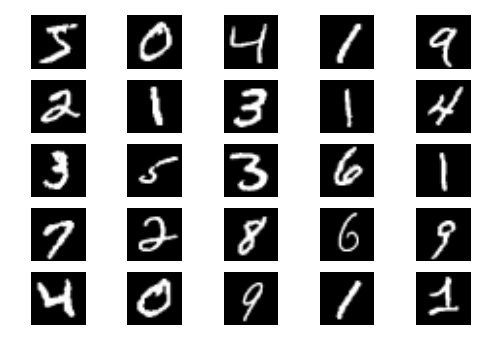

In [8]:
# plot the first 26 MNISt images into 5 x 5 grid

for i in range(25):
    pylab.subplot(5,5,i+1)
    img = X_train[i]
    pylab.axis('off')
    pylab.imshow(img)
    pylab.gray()
pylab.show()

The lables are now in a single list of numbers 0-9. For the cross-entropy loss calculations, the labels need to be in onehot format (can you say why?). Construct a simple function to convert  the labels into one-hot format. Make sure your function works with different batch sizes, including a batch size of one.

In [9]:
# construct a function to convert list of labels to onehot format

def onehot(input):
    onehot = np.zeros((input.shape[0], 10), dtype='int32')
    onehot[np.arange(input.shape[0]), input] = 1
    return onehot

In [10]:
# use the function to create the onehot vectors for both the training set and the test set
# print out some onehot vectors to see that they are correct

y_train_onehot=onehot(y_train_labels)
y_test_onehot=onehot(y_test_labels)

print y_test_onehot[:10]

[[0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0]]


## Part 2: a simple shallow linear network

Now we should be ready to start constructing a simple MLP network that we can use for our experiments. We will first construct a simple shallow linear network, which takes flattened MNIST images as an input, so we flatten the images into row vectors. All images will be in a single matrix, where the rows correspond to the number of images in the batch size, and the columns represent the input dimensionality. One flattened 28x28 pixel MNIST image has thus shape 1 x 784.

<img src="img/ff_linear1.png" />

In this part, we just check if our learning procedure works. We will overfit our network to only 300 samples from the training set and see that the loss decreases as expected, and that the training accuracy is close to one. The test accuracy is expected to be much lower.

In [11]:
# take 300 samples from the training set
# flatten each 28x28 image into single row vector and construct the input matrix 

batch_overfit = 300

X_in=X_train[0:batch_overfit].reshape(-1,784)
y_in=y_train_onehot[0:batch_overfit]

Construct a tensorflow computational graph for an as simple as possible linear mlp network. Only input and output layer and softmax activation. Use cross entropy loss. 

In [12]:
#Placeholders
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

In [13]:
# Weights and biases
W1 = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1)) 
b1 = tf.Variable(tf.zeros([10]))

In [14]:
#Tensorflow computational graph 
y = tf.matmul(x,W1) + b1

In [15]:
#loss calculations

logits_ff = tf.nn.softmax(y)
loss = tf.reduce_sum(tf.multiply(-tf.log(logits_ff), y_)) / batch_overfit

In [16]:
#session intialization
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

iteration 0: loss: 2.84224414825
iteration 10: loss: 0.602554500103
iteration 20: loss: 0.392819494009
iteration 30: loss: 0.295383512974
iteration 40: loss: 0.23554199934
training accuracy 0.983333
test accuracy 0.725


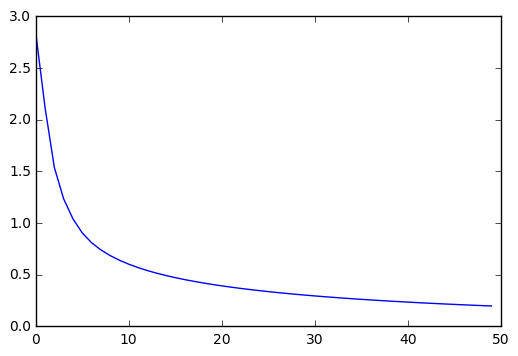

In [17]:
learning_rate = 0.5
accuracy_values = np.array([])
cost_values = np.array([])
var_list = [W1, b1]

for i in range(50):
    loss_train = loss.eval(feed_dict={x: X_in, y_: y_in})
    cost_values = np.append(cost_values, loss_train)

    gradients = tf.gradients(loss,[W1, b1])  # calculate here the gradients

    updates = [W1.assign_sub(learning_rate * gradients[0]), b1.assign_sub(learning_rate * gradients[1])]
    gradient_descent = tf.group(*updates)  # here you perform the parameter updates
    
    gradient_descent = tf.group(*updates)  # control flow op 
    sess.run(gradient_descent, feed_dict={x: X_in, y_: y_in})
    
    if i % 10 == 0:        
        print 'iteration {}: loss: {}'.format(i, loss_train)

# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print'training accuracy',sess.run(accuracy, feed_dict={x: X_in, y_: y_in})
print'test accuracy',sess.run(accuracy, feed_dict={x: X_test.reshape(-1,784), y_: y_test_onehot})

plt.plot(cost_values)



##  Part 3: Vanilla RNN

Let us next try to construct a simple vanilla recurrent neural network in a similar manner. It is a good idea to define all hyperparameters in the beginning to make the program more scalable.

<img src="img/rnn1.png" />

In [18]:
input_xdim = 28
input_ydim = 28
learning_rate = 1e-4
hidden_features = 100
batch_size = 100
classes = 10
iterations = 1000 # Must be at least 10k to obtain over 90%

Let's define the placeholders for the input data. This time the placeholder for the input image needs to be a tensor of rank 3, as we will feed one row of the image at each timestep.

In [19]:
input_rows = tf.placeholder(tf.float32, [None, input_xdim, input_ydim])
labels = tf.placeholder(tf.float32, [None, classes])

Next we want to define the trainable variables. In each RNN cell we need one weight matrix W for the hidden vector passed on from the previous cell, one weight matrix U for the actual input to the cell and a bias b1. We will also need a weight matrix V for the output layer from each cell and a bias b2.

In [20]:
W = tf.Variable(tf.truncated_normal([hidden_features, hidden_features], stddev=0.1))
U = tf.Variable(tf.truncated_normal([input_xdim, hidden_features], stddev=0.1))
V = tf.Variable(tf.truncated_normal([hidden_features, classes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[1, hidden_features]))
b2 = tf.Variable(tf.constant(0.1, shape=[1, classes]))

It is a good idea to have a function available for constructing the output layers. So let's define a function that takes as parameters an input and an activation function. If the function is called to create an output layer, it can be called with softmax as the activation. Use the above defined variables V and b2.

In [ ]:
def nn_layer(inputs, activation):
    outputs = ???
    return outputs

Now we make a very simple function for creating a vanilla RNN cell. It takes as parameters a particular row of the image and a hidden state. The output should be the new hidden state. Use the above defined variables W, U and b1, and tanh as activation.

In [ ]:
def rnn_cell(inputs, hidden):
    hidden_out = ???
    return hidden_out

In the next function we implement the actual RNN network. There is one RNN cell for each row, and each cell outputs a hidden vector, and an output state which is the hidden vector passed through a linear output layer with softmax. Average across all softmax outputs to get final prediction. There are many ways to do it, feel free to try out your own implementation. You can alternatively try to fill in the two incomplete parts in the function below. The only thing you have to do is to call the two previous functions with the right parameters!

In [ ]:
def rnn(inputs):
    rows = tf.unstack(inputs, input_ydim, 1) # Make an array of 2D tensors
    samples = tf.shape(rows)[1] # Number of samples in the batch/test set
    hidden_vec = tf.zeros([samples, hidden_features]) # Here we will store the hidden output from each cell
    for cell_index in range(input_ydim): # Iterate through all cells
        current = rows[cell_index] # Get the current row
        hidden_vec = ??? # Compute the hidden output from the current cell 
        cell_output = ??? # Compute the final output from the current cell
        if cell_index == 0:
            out = cell_output
        else:
            out = out + cell_output # Add together final outputs of all cells
    return tf.multiply(1.0/input_ydim, out) # and divide to get average

Now we are ready to get the prediction and calculate the cost function. For the prediction, we just call the rnn function and for the cost function write your own cross entropy function, i.e. multiply onehot label with the negative logarithm of the prediction, sum over all classes and average over all samples in the batch.

In [ ]:
score = rnn(input_rows)
cost_function = ???

In [ ]:
grads = tf.gradients(cost_function, [V, b2, U, W, b1])

Next try to implement your own version of gradient descent. tf.assign takes as the first parameter the variable to be updated as a second parameter the updated variable. The updated variable is simply the original variable minus learning rate multiplied by the gradient for the respective variable.

In [ ]:
updates = [tf.assign(???),
                   tf.assign(???),
                   tf.assign(???),
                   tf.assign(???),
                   tf.assign(???)]

gradient_descent = tf.group(*updates)

In [ ]:
true_labels = tf.argmax(labels, axis = 1)
predicted_labels = tf.argmax(score, 1)

In [ ]:
evaluate = tf.equal(true_labels, predicted_labels)
accuracy = tf.reduce_mean(tf.cast(evaluate, tf.float32))

In [ ]:
train_image = X_train.reshape(30000, input_ydim, input_xdim)
test_image = X_test.reshape(3000, input_ydim, input_xdim)

In [ ]:
train_loss = np.zeros(iterations/100, float)
train_acc = np.zeros(iterations/100, float)

In [ ]:
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(iterations):
    start = (i * batch_size) % (30000 - (2 * batch_size))
    end = start + batch_size
    batch_image = X_train[start:end, :, :]
    batch_label = y_train_onehot[start:end, :]
    sess.run(gradient_descent, feed_dict={input_rows: batch_image, labels: batch_label})
    if i % 100 == 0:  
        print 'iteration {} '.format(i)
        train_loss[i/100] = cost_function.eval(feed_dict={input_rows: batch_image, labels: batch_label})
        train_acc[i/100] = accuracy.eval(feed_dict={input_rows: batch_image, labels: batch_label})
print("The test accuracy is %g" %accuracy.eval(feed_dict={input_rows: test_image, labels: y_test_onehot}))

The final part of the exercise is to visualize the results for the rnn network. We will plot the training loss and accuracy, and draw a confusion matrix to see how the true and predicted classes relate to one another. (The main goal here is to practise visulizations with matplotlib, keep in mind that rnn's are not ideal for learning mnist.)

In [ ]:
confusion_matrix = ??? # use tf.confusion_matrix
cm = confusion_matrix.eval(feed_dict={input_rows: test_image, labels: y_test_onehot})

In [ ]:
fig1 = plt.figure()
iters = range(len(train_loss)) # x values values for plots
# Use matplotlib to plot training cost and accuracy
???
plt.draw()

fig2 = plt.figure()
# Use matplotlib to draw confusion matrix
???
plt.draw()
sess.close()
plt.show()